<a href="https://colab.research.google.com/github/Snehadevop/devopss/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Shape: (50000, 32, 32, 3)
Testing Shape: (10000, 32, 32, 3)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,194 (1.36 MB)

 Trainable params: 357,002 (1.36 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 134ms/step - accuracy: 0.3453 - loss: 1.8054 - val_accuracy: 0.5463 - val_loss: 1.2791
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.5553 - loss: 1.2605 - val_accuracy: 0.5478 - val_loss: 1.3237
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.6337 - loss: 1.0625 - val_accuracy: 0.5907 - val_loss: 1.1881
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 130ms/step - accuracy: 0.6748 - loss: 0.9300 - val_accuracy: 0.6636 - val_loss: 0.9562
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.7169 - loss: 0.8130 - val_accuracy: 0.6798 - val_loss: 0.9301
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.7419 - loss: 0.7313 - val_accuracy: 0.6512 - val_loss: 1.0834
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.7636 - loss: 0.6718 - val_accuracy: 0.6608 - val_loss: 1.0616
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 131ms/step - accuracy: 0.7873 - loss: 

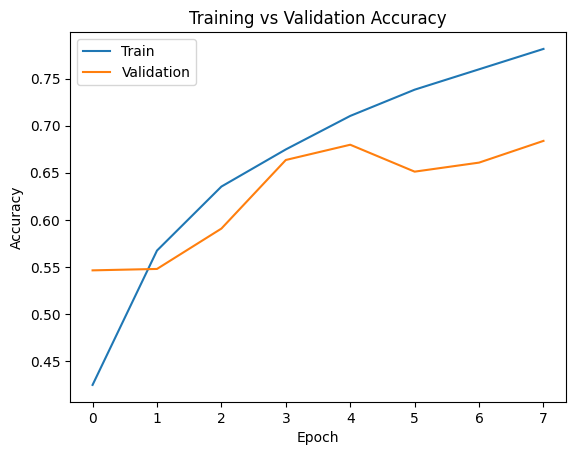

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


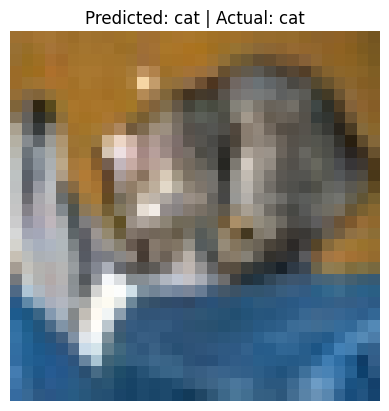

Model saved successfully!


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models

#  Load and Prepare Dataset

def load_data():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Normalize pixel values
    X_train = X_train.astype("float32") / 255.0
    X_test = X_test.astype("float32") / 255.0

    return X_train, X_test, y_train, y_test

#  Build CNN Model
def build_model():
    cnn = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    cnn.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return cnn
#  Train Model
def train_model(model, X_train, y_train):
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stop]
    )

    return history

#  Plot Accuracy Graph

def plot_graph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Validation"])
    plt.show()

#  Show Prediction
def display_prediction(model, X_test, y_test, index, class_labels):
    prediction = model.predict(X_test[index:index+1])

    plt.imshow(X_test[index])
    plt.title(f"Predicted: {class_labels[np.argmax(prediction)]} | "
              f"Actual: {class_labels[y_test[index][0]]}")
    plt.axis("off")
    plt.show()

# Main Execution

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

X_train, X_test, y_train, y_test = load_data()

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

cnn_model = build_model()
cnn_model.summary()

history = train_model(cnn_model, X_train, y_train)

loss, accuracy = cnn_model.evaluate(X_test, y_test)
print("\nFinal Test Accuracy:", accuracy)

plot_graph(history)

# Show sample prediction
display_prediction(cnn_model, X_test, y_test, 0, class_names)

# Save Model
cnn_model.save("cifar10_cnn_model.keras")
print("Model saved successfully!")